# Exploring the Relationship Between Movie Genres and Gross Domestic Revenue

For our first business insight, we will be researching and exploring how genre affects domestic revenue. This is relevant as very costly resources are allocated to creating movies and it is important to understand what genres perform the best prior to making a decision as to what kind of movies Computing Vision will make. Let's start by taking a look at our movie data.

<img src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2022/05/movie_theater_1400.jpg?w=1400&ssl=1" width=500>

Image Source: https://news.northeastern.edu/2022/05/26/movie-theater-hearing-damage/

By Alivia and Vaia

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import sqrt
%matplotlib inline


In [2]:
# connect to sqlite database to import data and view genres of movies
conn = sqlite3.connect("../../zippedData/im.db")
imbd = pd.read_sql('''
SELECT *
FROM movie_basics

''', conn)

In [3]:
# preview data
imbd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# view data cleanliness and null values
imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
# import csv with domestic revenue and preview data
revenue_df = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")
revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# rename column with movie title to prepare for pandas join
revenue_df.rename(columns={'movie': 'primary_title'}, inplace=True)
revenue_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# create new dataframe including genre, domestic revenue, and  movie title
movies1 = pd.merge(imbd, revenue_df, on ='primary_title')
movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   id                 3815 non-null   int64  
 7   release_date       3815 non-null   object 
 8   production_budget  3815 non-null   object 
 9   domestic_gross     3815 non-null   object 
 10  worldwide_gross    3815 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 357.7+ KB


In [8]:
# drop rows with genre value as null
movies = movies1.dropna(subset= ['genres'])
movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"


In [9]:
# create column which contains just one genre instead of a list of genres
movies['main_genre'] = movies["genres"].str.split(',')
movies_df = movies.explode('main_genre')

<ipython-input-9-eb6c512f8464>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['main_genre'] = movies["genres"].str.split(',')


In [10]:
# dropping duplicates 
movies_df = movies_df.drop_duplicates(subset= ['movie_id'])

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3539 non-null   object 
 1   primary_title      3539 non-null   object 
 2   original_title     3539 non-null   object 
 3   start_year         3539 non-null   int64  
 4   runtime_minutes    3133 non-null   float64
 5   genres             3539 non-null   object 
 6   id                 3539 non-null   int64  
 7   release_date       3539 non-null   object 
 8   production_budget  3539 non-null   object 
 9   domestic_gross     3539 non-null   object 
 10  worldwide_gross    3539 non-null   object 
 11  main_genre         3539 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 359.4+ KB


In [12]:
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706",Action
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227",Action
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",Comedy
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",Adventure
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008","$2,500,000","$174,255","$174,255",Documentary
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907",Crime
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226",Action
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004","$40,000,000","$75,305,995","$124,823,094",Crime


In [13]:
# make domestic gross into integer without dollar sign
def clean_dollar(df, column):
    df[column] = df[column].str.strip('$')
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype(int)
    return df[column]

clean_dollar(movies_df,'domestic_gross')

0              0
1       70433227
3        1109808
4         720828
5         720828
          ...   
3810      174255
3811    12592907
3812    23530831
3813    75305995
3814           0
Name: domestic_gross, Length: 3539, dtype: int32

In [14]:
# counts of each genre
movies_df_counts = movies_df.groupby(['main_genre'])['movie_id'].count().reset_index()
# sort data frame to ensure that the visualization is in order
movies_df_test_counts = movies_df_test.sort_values(by='movie_id', ascending=False)
movies_df_test_counts

NameError: name 'movies_df_test' is not defined

In [ ]:
# plot distribution
plt.figure(figsize=(20,12))

plt.bar(movies_df_test['main_genre'], movies_df_test["movie_id"], color='#86BC24')

plt.xlabel('Genres', fontsize=22, fontweight='bold')
plt.ylabel('Number of Movies', fontsize = 22, fontweight='bold')
plt.xticks(rotation='45', fontsize = 16)


plt.title('Number of Movies per Genre', fontsize = 28, fontweight='bold')


plt.show()


# Visualization Analysis: Distribution of Data
Our bar plot shows how many movies of each genre are represented in the dataset. We can observe some saturation in the drama and action categories. So much of the data lays in these categories because of how many movies of this genre have been made in the past decade. This notion is going to contribute to our hypothesis test

In [15]:
# get mean revenue per each genre
movies_df_test = movies_df.groupby(['main_genre'])['domestic_gross'].mean().reset_index()
# sort data frame to ensure that the visualization is in order
movies_df_test = movies_df_test.sort_values(by='domestic_gross', ascending=False)
movies_df_test

,main_genre,domestic_gross
8,Family,1.081283e+08
12,Musical,8.673849e+07
9,Fantasy,8.261379e+07
1,Adventure,8.170441e+07
2,Animation,7.487855e+07
0,Action,6.787744e+07
18,War,5.187002e+07
15,Sci-Fi,4.083381e+07
13,Mystery,3.760851e+07
11,Music,3.635295e+07


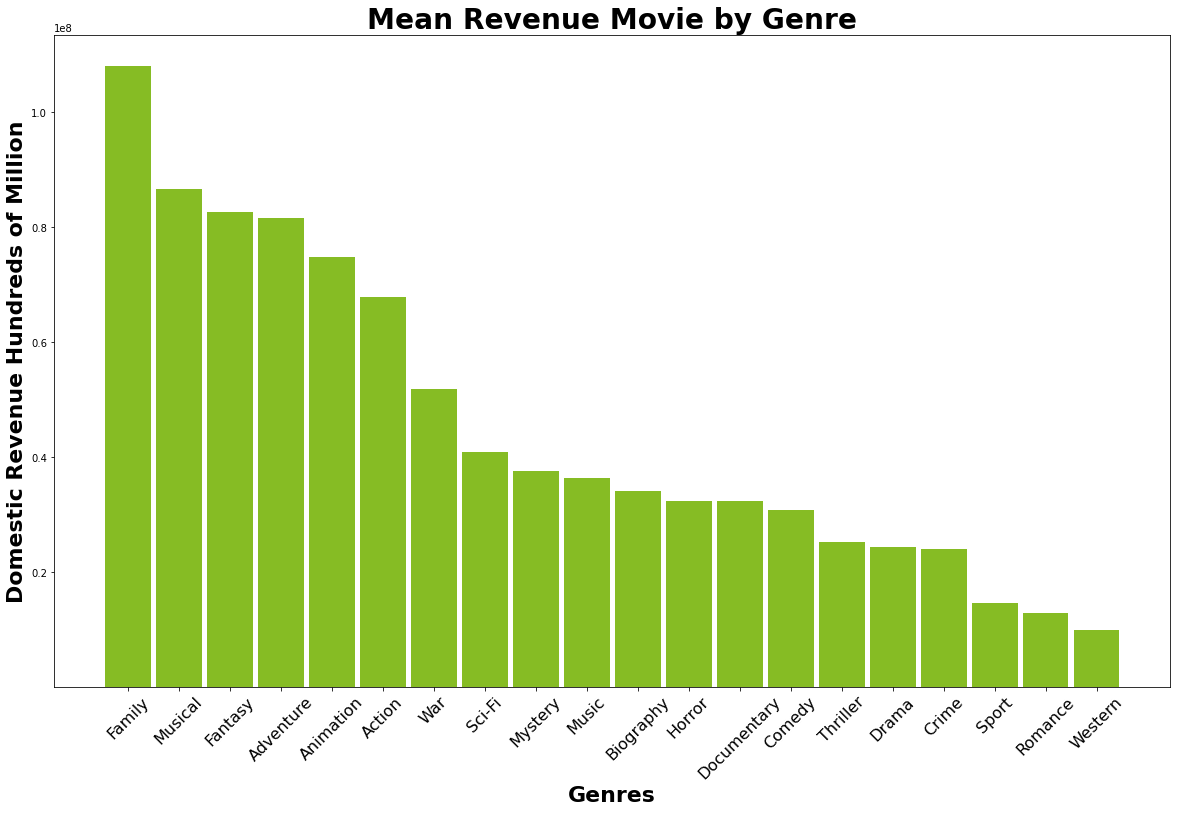

In [16]:
# plot genre in relation to revenue - this visualization excludes outliers

plt.figure(figsize=(20,12))

plt.bar(movies_df_test['main_genre'], movies_df_test["domestic_gross"], width=0.9, bottom=0.2, color='#86BC24')

plt.xlabel('Genres', fontsize=22, fontweight='bold')
plt.ylabel('Domestic Revenue Hundreds of Million', fontsize = 22, fontweight='bold')
plt.xticks(rotation='45', fontsize = 16)


plt.title('Mean Revenue Movie by Genre', fontsize = 28, fontweight='bold')


plt.show()


# Visualization Analysis: Mean of Each Genre
According to our bar plot, the genres with the greatest performing movies in terms of average gross domestic revenue are of the family, musica, fantasy, and adventure genres. It is to be noted that often times action, family, and adventure movies are typically marketed towards and consumed by a wider group of people due to age appropriate ratings as opposed to horror, for example, which is often times rated PG-13 or R and cannot be seen by a large group of people. This notion will guide our hypothesis test that is later to come. Let's see what the top family movies are called!

In [17]:
top_family = movies_df[(movies_df['main_genre'] == 'Family')]
top_family.sort_values(by='domestic_gross', ascending=False).head(6)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
2776,tt8852130,Titanic,Titanic,2018,115.0,Family,43,"Dec 19, 1997","$200,000,000",659363944,"$2,208,208,395",Family
2620,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",35,"Mar 17, 2017","$160,000,000",504014165,"$1,259,199,706",Family
2622,tt9173998,Beauty and the Beast,Beauty and the Beast,2018,60.0,"Family,Fantasy,Musical",35,"Mar 17, 2017","$160,000,000",504014165,"$1,259,199,706",Family
1447,tt2071483,Inside Out,Inside Out,2011,59.0,Family,98,"Jun 19, 2015","$175,000,000",356461711,"$854,235,992",Family
2555,tt9618596,The Book of Life,The Book of Life,2010,NaN,Family,35,"Oct 17, 2014","$50,000,000",50151543,"$97,651,543",Family
2460,tt9313558,Coming Home,Coming Home,2018,50.0,Family,72,"Jan 1, 1978","$3,000,000",32653000,"$32,653,000",Family


It appears we have a duplicate for Beauty and the Beast with different start years, as this movie most likely aired twice in different parts of the world.

# Hypothesis Test: Optimal Movie Genre?
We hypothesize that the movies which are classified in the family genre have a higher gross revenue than other genres as more people are able to see it in theatres because of age appropriate ratings and themes. They are often light-hearted, feel-good, and moving without the distressing themes that other genres such as horror or drama may have.

## Null: Family movies have a lower or equal average gross domestic revenue than the rest of movies 


## Alternative: Family movies have a significantly greater gross domestic revenue than the rest of movies

We will be conducting a one sample t-test at the alpha level of 0.05 to compare the mean gross revenue of family movies versus the mean gross revenue of all movies, to see if this genre sticks out as more successful than others. 

In [18]:
# choose significance level
# this means we are 95% sure that we are correct
a = 0.05
a

0.05

In [19]:
mu = movies_df['domestic_gross'].mean() # population mean
mu

40874293.98954507

In [20]:
sigma = movies_df['domestic_gross'].std() # population standard deviation
sigma

71722959.89199439

In [21]:
n = len(movies_df[movies_df['main_genre'] == 'Family']) # sample size
n

20

In [22]:
# query domestic gross for just action movies and store it into variable to calculate 'sample' mean
sample_family = movies_df.query("main_genre == 'Family'")['domestic_gross']
sample_family

858         36686
1116      3681811
1263     13843771
1301      1183658
1408        19800
1447    356461711
1605      9204489
2387            0
2460     32653000
2497            0
2555     50151543
2620    504014165
2622    504014165
2642     27467564
2766       406216
2776    659363944
3143            0
3144        64148
3364            0
3408            0
Name: domestic_gross, dtype: int32

In [23]:
x_bar = sample_family.mean() # sample mean
x_bar

108128333.55

In [24]:
# difference between population mean and sample mean
diff = x_bar - mu
diff

67254039.56045493

In [25]:
# degrees of freedom
deg_of_freedom = n - 1
deg_of_freedom

19

## Summary of Data
Our sample contains 20 observations, with a mean of 108128333.55 and a standard deviation of 71722959.9 with 19 degrees of freedom. The difference between the sample and population mean is 67254039.6.

This means that family movies should be about $108,128,333 higher than the population mean.


In [26]:
# calculate t statistic
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

4.193485724657692

## Plot T Statistic

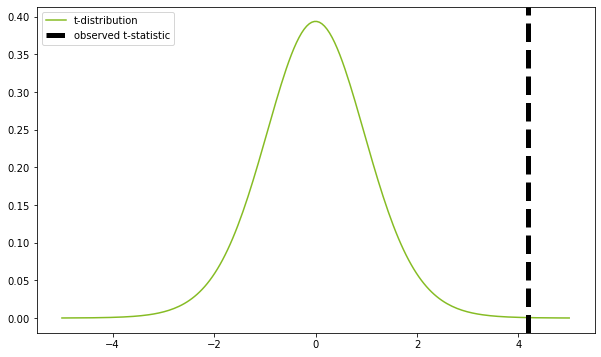

In [27]:
# plot t statistic
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(-5, 5, 200)

y = stats.t.pdf(x, deg_of_freedom, 0, 1)

ax.plot(x, y, color='#86BC24', label="t-distribution")

ax.axvline(t, color='black', linestyle='--', lw=5,label='observed t-statistic')

ax.legend()

In [28]:
# find critical value
t_crit = stats.t.ppf(1 - 0.05, df=19)
t_crit

1.729132811521367

## Rejection Region
The area shaded in gray marks the values in which we must reject the null hypothesis

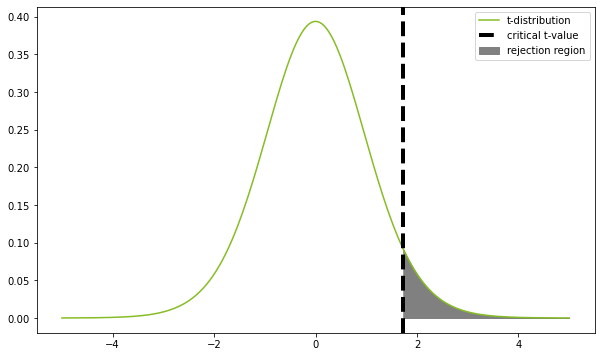

In [29]:
# plot rejection region 
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, color='#86BC24', label="t-distribution")

ax.axvline(t_crit,color='black',linestyle='--',lw=4,label='critical t-value')

ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

ax.legend()

In [30]:
# calculcate p-value 
p_value = stats.t.sf(t, df=19)
p_value

0.0002462914645891097

In [31]:
# interpret our p-value in terms of our alpha level 
p_value < a

True

We can reject the null hypotehssis!

In [32]:
# Is there is a statistically significant difference?
# Can we reject the null hypothesis?
t > t_crit

True

Our p-value is less than the alpha so we must reject the null hypothesis!

## Hypothesis Test Results 
### We reject the null and conclude that family movies have a significantly greater gross domestic revenue than the rest of movies!

Taking this into consideration, we make the suggestion that the studio should focus on creating family movies in order to maximize revenue.

<img src="https://assets.simpleviewinc.com/simpleview/image/upload/c_fill,h_805,q_50,w_1903/v1/clients/eauclaire-redesign/2da0fb8c_23a4_430a_b852_abb92a27f8b0_1d053ad0-78ed-4dc2-8fb2-47f6160893e8.jpg" width=500>

Image Source: https://www.visiteauclaire.com/things-to-do/arts/cinemas/

sources: https://github.com/learn-co-curriculum/dsc-t-tests